# Part 1 :Exploratory data analysis

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [178]:
df_login = pd.read_json('logins.json')
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [179]:
df_login.set_index('login_time', inplace=True)
df_login["count"] = 1

In [180]:
df_login=df_login.resample('15T', how='sum')


C:\Users\thinh\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


In [181]:
df_login.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [182]:
df_login = df_login.fillna(0).reset_index()
df_login.head()

,login_time,count
0,1970-01-01 20:00:00,2.0
1,1970-01-01 20:15:00,6.0
2,1970-01-01 20:30:00,9.0
3,1970-01-01 20:45:00,7.0
4,1970-01-01 21:00:00,1.0


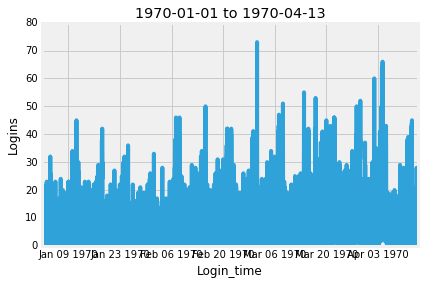

In [183]:
x = df_login['login_time']
y = df_login['count']
plt.plot(x, y)
plt.xlabel("Login_time")
plt.ylabel("Logins")
plt.title('1970-01-01 to 1970-04-13')
plt.show()


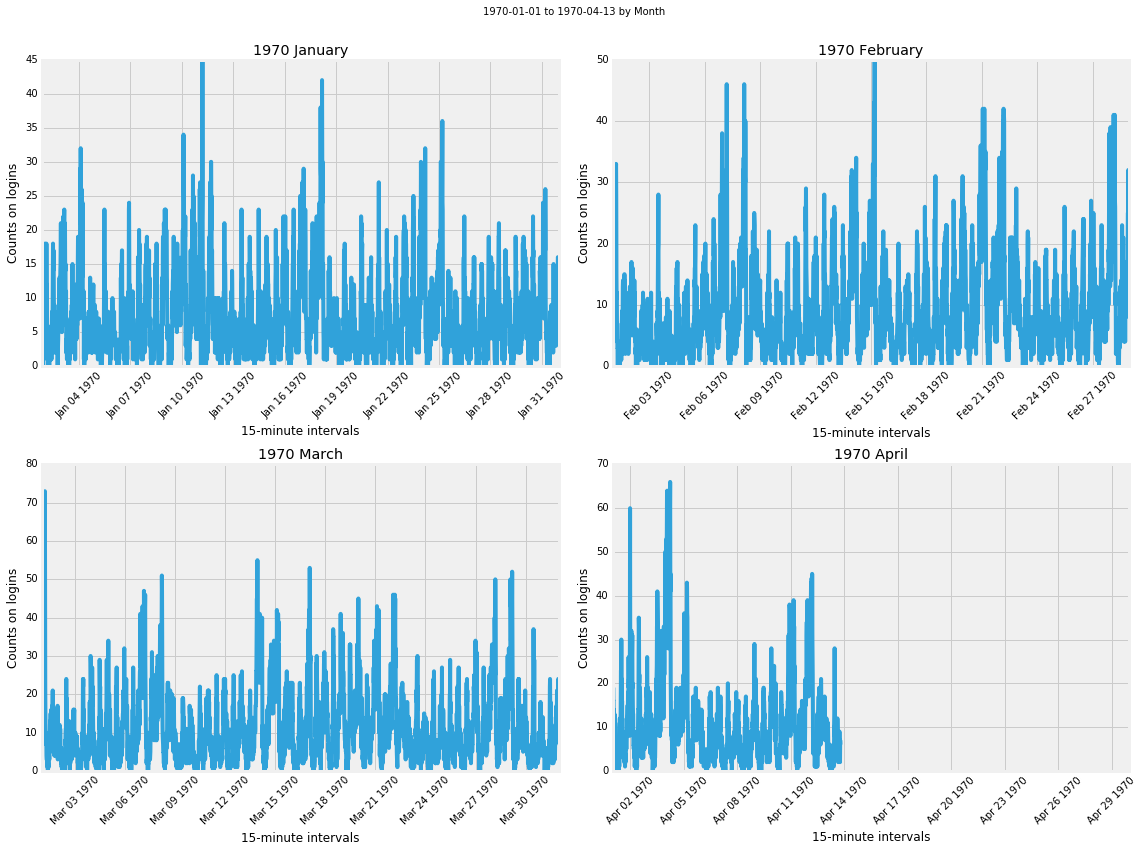

In [184]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16, 12)
plt.suptitle('1970-01-01 to 1970-04-13 by Month')

plt.subplot(2, 2, 1)
jan=df_login[(df_login['login_time'] > '1970-01') & (df_login['login_time'] < '1970-02')]
x = jan['login_time']
y = jan['count']
plt.plot(x, y)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 January')

plt.subplot(2, 2, 2)
feb=df_login[(df_login['login_time'] > '1970-02') & (df_login['login_time'] < '1970-03')]
x = feb['login_time']
y = feb['count']
plt.plot(x, y)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 February')

plt.subplot(2, 2, 3)
mar=df_login[(df_login['login_time'] > '1970-03') & (df_login['login_time'] < '1970-04')]
x = mar['login_time']
y = mar['count']
plt.plot(x, y)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 March')

plt.subplot(2, 2, 4)
arp=df_login[(df_login['login_time'] > '1970-04') & (df_login['login_time'] < '1970-05')]
x = arp['login_time']
y = arp['count']
plt.plot(x, y)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.xlim('1970-04-01', '1970-04-30')
plt.title('1970 April')

plt.tight_layout(rect=[0, 0, 1, 0.95])

In [185]:
df_login['date'] = df_login['login_time'].apply(lambda d: dt.date(d.year, d.month, d.day))
df_login['hour'] = df_login['login_time'].apply(lambda d: d.hour)
df_login['weekday'] = df_login['login_time'].apply(lambda d: d.weekday())

In [186]:
wkday_count = df_login.groupby('weekday').sum()
objects = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
y_pos = np.arange(len(objects))
wkday_count.head()

,count,hour
weekday,,
0,8823.0,16140
1,9268.0,15456
2,10339.0,15456
3,11960.0,15800
4,15208.0,16560


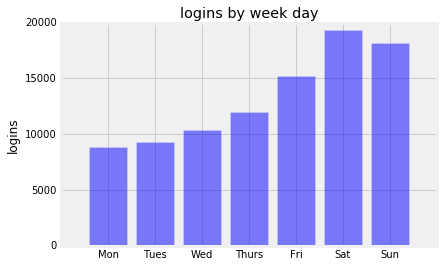

In [187]:
plt.bar(y_pos, wkday_count['count'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('logins')
plt.title('logins by week day')
 
plt.show()

In [188]:
hour_count = df_login.drop('weekday', axis=1).groupby('hour').sum()
hour_count.head()

,count
hour,
0,5993.0
1,6317.0
2,5800.0
3,4831.0
4,5034.0


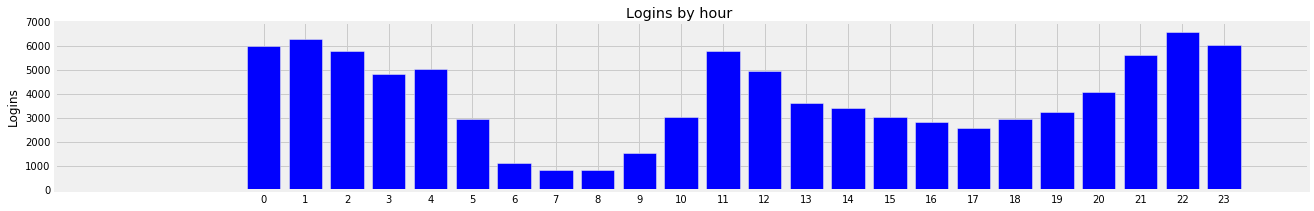

In [189]:
objects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y_pos = np.arange(len(objects))
plt.figure(figsize=(20, 3))

plt.bar(y_pos, hour_count['count'],align='center', alpha=2)
plt.xticks(y_pos, objects)
plt.ylabel('Logins')
plt.title('Logins by hour ')
 
plt.show()

Summary

•	From January to April, the It has all have similar distribution of logins, but March has the most logins for the month, followed by February, and then January.

•	Days of the week distribution of logins, it looks like the distribution of logins are increasing as the days go by. Weekends display the most logins, especially Saturday.

•	Hours of the week distribution of logins, it is shown that early morning between 6 am and 9 am has the least logins, then there is a peak during lunch hours between 11am to noon, the highest peak at night between 9 pm to 2 am.


# Part 2 ‐ Experiment and metrics design

Question 1: What would you choose as the key measure of success of this experiment in encouraging driver partners to server both cities, and why would you choose this metric?

    
I believe that the key measure of success of this experiment in encouraging driver partners to server both cities is creating a toll road because it is to save time and increase productivity. I choose this metric because it is intuitive for understanding and easy to apply statistical tests


Question 2: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. How you will implement the experiment
b. What statistical test(s) you will conduct to verify the significance of the observation
c. How would you interpret the results and provide recommendations to the city operations team along with any caveats. 


We can conduct A/B test for this experiment.  The control group is the one with toll bridge, the test group is the one without toll bridge. We record the data in both sides and compare them against each other in couple months. 

A statistical test that we will conduct is two sample tests and calculate a p-value of (0.5).

If the null hypothesis is rejected which means that there is a different between two groups. If city has profit from toll bridge, the city would optimize the solution.  The null is not rejected which means that is no different between two groups.  If city has no profit, we would need to conduct more studies and test. 


# Part 3 - Predictive Modeling

In [190]:
import json
data = json.load(open('ultimate_data_challenge.json'))
data = pd.DataFrame(data)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [191]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [192]:
# Check if there is any null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [193]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

data['signup_date'] = pd.to_datetime(data['signup_date'])

In [194]:
data['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [195]:
data['last_trip_date'].min()

Timestamp('2014-01-01 00:00:00')

In [196]:
data['signup_date'].max()

Timestamp('2014-01-31 00:00:00')

In [197]:
data['signup_date'].min()

Timestamp('2014-01-01 00:00:00')

# test Active in 30 days 

In [198]:
last_day = max(data['last_trip_date'])
days = pd.date_range(end=last_day, periods=30, freq='D')
data['30active'] = data['last_trip_date'].map(lambda x:'1' if x in days else '0')

In [199]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,30active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [200]:
data['30active'].value_counts(True)

0    0.6338
1    0.3662
Name: 30active, dtype: float64

In [201]:
data.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388
ultimate_black_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000


# Users Situation by City

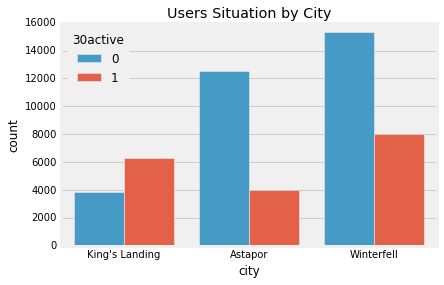

In [202]:
sns.countplot(x='city', hue='30active', data=data)
plt.title('Users Situation by City')

# Users Situation by Phone

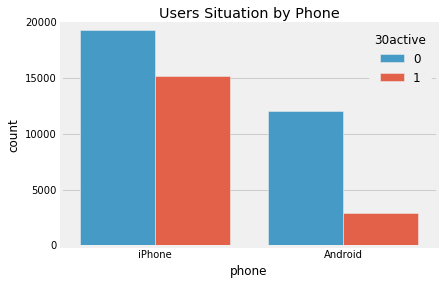

In [203]:
sns.countplot(x='phone', hue='30active', data=data)
plt.title('Users Situation by Phone')

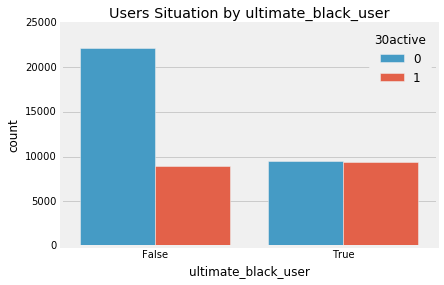

In [204]:
sns.countplot(x='ultimate_black_user', hue='30active', data=data)
plt.title('Users Situation by ultimate_black_user')

# Average Rating by Driver Boxplot for Active and Inactive Users

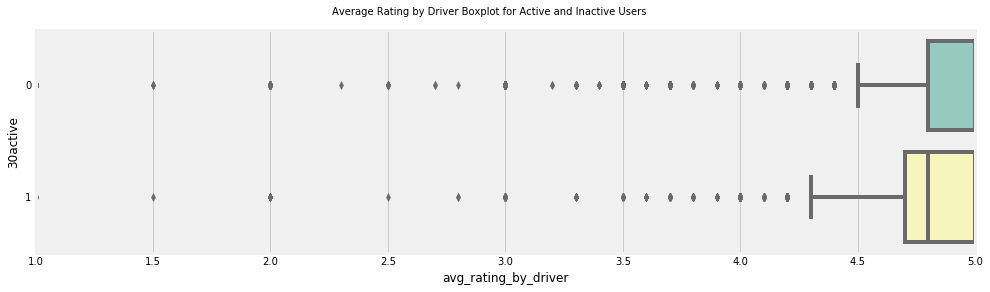

In [205]:
f, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x= "avg_rating_by_driver", y="30active" ,data=data, orient="h", palette="Set3")
plt.suptitle('Average Rating by Driver Boxplot for Active and Inactive Users')

# Average Rating of Driver Boxplot for Active and Inactive Users

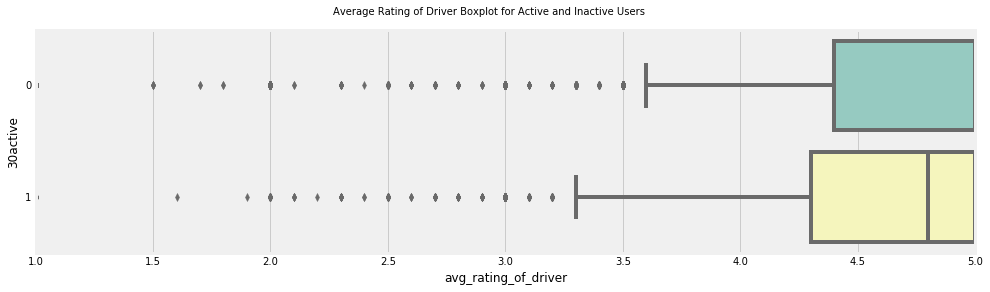

In [206]:
f, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x= "avg_rating_of_driver", y="30active" ,data=data, orient="h", palette="Set3")
plt.suptitle('Average Rating of Driver Boxplot for Active and Inactive Users')

# Average dist Boxplot for Active and Inactive Users

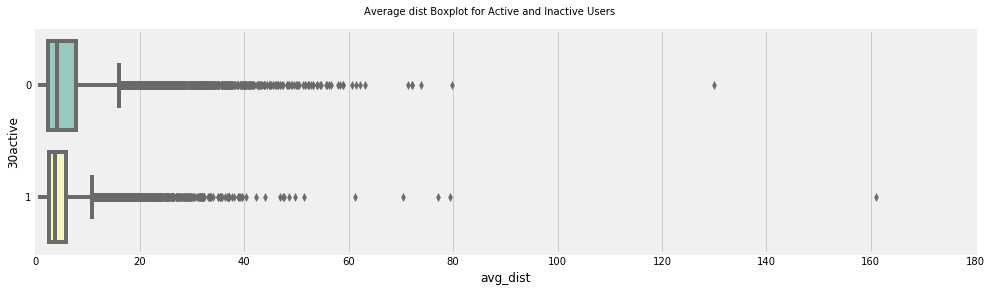

In [207]:
f, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x= "avg_dist", y="30active" ,data=data, orient="h", palette="Set3")
plt.suptitle('Average dist Boxplot for Active and Inactive Users')

# Average surge Boxplot for Active and Inactive Users

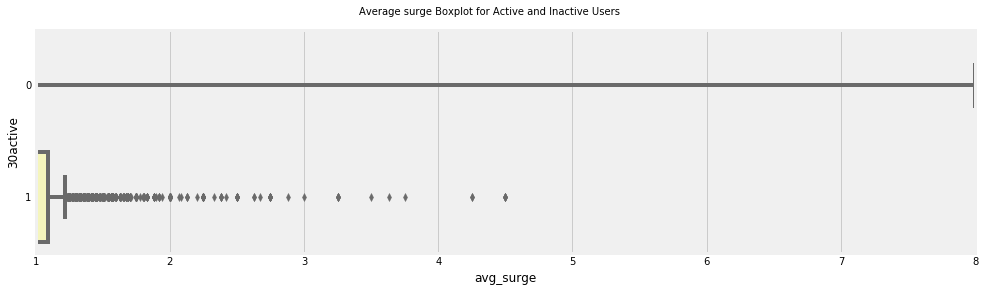

In [208]:
f, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x= "avg_surge", y="30active" ,data=data, orient="h", palette="Set3")
plt.suptitle('Average surge Boxplot for Active and Inactive Users')

# Average surge pct for Active and Inactive Users

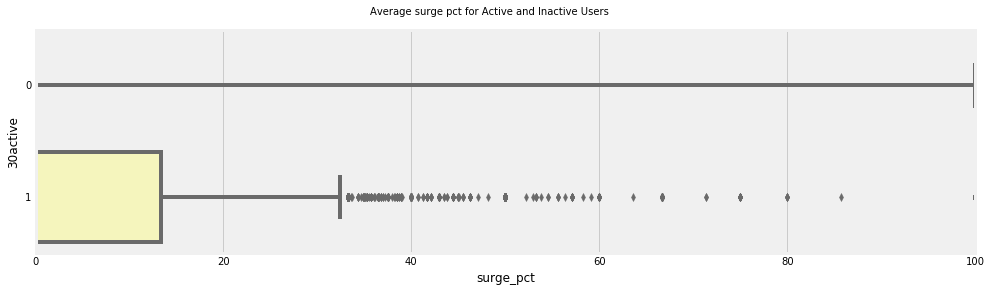

In [209]:
f, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x= "surge_pct", y="30active" ,data=data, orient="h", palette="Set3")
plt.suptitle('Average surge pct for Active and Inactive Users')

# cleaning and model 

In [210]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,30active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [211]:
data['signup_day'] = data['signup_date'].dt.day


In [212]:
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean(), inplace=True)
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean(), inplace=True)
data['phone'].fillna('none', inplace=True)

In [213]:
city = pd.get_dummies(data['city'], drop_first=True)
phone = pd.get_dummies(data['phone'], drop_first=True)
data.ultimate_black_user = (data['ultimate_black_user']).astype(int)
data.drop(['last_trip_date', 'signup_date', 'city', 'phone'], axis=1, inplace=True)
data = data.join([city, phone])

data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,30active,signup_day,King's Landing,Winterfell,iPhone,none
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,25,1,0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,29,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,6,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,10,1,0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,27,0,1,0,0


In [214]:
data['30active'] = data['30active'].convert_objects(convert_numeric=True)

C:\Users\thinh\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


# machine learning 

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier

In [216]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

# Create train and test splits
target_name = '30active'
X = data.drop('30active', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [217]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.63


In [218]:
data.isnull().any()
data = data.fillna(lambda x: x.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
30active                  50000 non-null int64
signup_day                50000 non-null int64
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
iPhone                    50000 non-null uint8
none                      50000 non-null uint8
dtypes: float64(6), int32(1), int64(3), uint8(4)
memory usage: 3.8 MB


In [219]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=0.43)


model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.73


In [220]:

# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.767 (0.008)


In [221]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
  class_weight="balanced", min_weight_fraction_leaf=0.01
    
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
   bootstrap= True, n_estimators=10, min_samples_split=4, criterion='entropy', max_features= 0.25, max_depth=6,
    class_weight="balanced"
    
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.63      1.00      0.78      4754
           1       0.00      0.00      0.00      2746

   micro avg       0.63      0.63      0.63      7500
   macro avg       0.32      0.50      0.39      7500
weighted avg       0.40      0.63      0.49      7500



 ---Logistic Model---
Logistic AUC = 0.70
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      4754
           1       0.59      0.68      0.63      2746

   micro avg       0.71      0.71      0.71      7500
   macro avg       0.69      0.70      0.70      7500
weighted avg       0.72      0.71      0.71      7500



 ---Decision Tree Model---
Decision Tree AUC = 0.76
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      4754
           1       0.65      0.75      0.70      2746

   micro avg       0.76      0.76      0.76   

C:\Users\thinh\Anaconda3\envs\tutorial\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\thinh\Anaconda3\envs\tutorial\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\thinh\Anaconda3\envs\tutorial\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


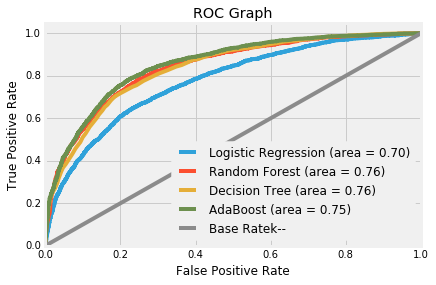

In [222]:

# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

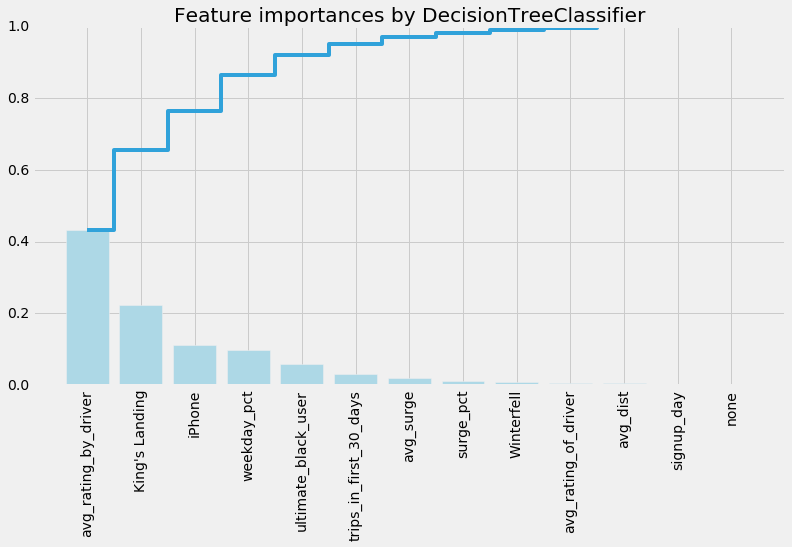

In [223]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = data.drop(['30active'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.


Through this problem, I use four algorithms types to predict my models such as logistic regression, random forest, decision tree and adboost. Through the ROC graph, the random forest has the highest f1 score among others with 0.76.


Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long¬term rider retention (again, a few sentences will suffice).


Based on my Decision Tree Classifier, top three most important features are average rating by diver, king’s landing and iPhone. Ultimate should consider to research on the city and phone user. For city, ultimate should investigate which factors make the king landing services has higher services and make improvement to other cities. For phone user, ultimate should research on the user experience between iPhone and android. iPhone may have a friendly UI then android. 
